## Capstone Project
**Finding an optimal place to open a Pakistani restaurant in Karachi**

### **Saifal Talpur**

***Engineer and Data Scientist***

## Table of contents
1. Introduction
2. Data acquisition
3. Methodology
4. Analysis
5. Results and Discussion
6. Conclusions

## 1. Introduction  <a name="introduction"></a>

This project is related to finding an optimal location for opening a Pakistani restaurant in the metropolitan city of Karachi, located in the southern region of Pakistan. The city is also termed as the "city of lights." It consists of over 30 million population with diverse ethnicity. The city is also the financial hub of Pakistan, a south asian nation bordering China, India, Iran and Afghanistan.
Since, it is the major financial attraction and involves a huge population, there exists tremendous business opportunities in Karachi. Majority of the business carried out in the 'city of lights' is either in manufacturing or in the service sector. Investing in the service sector is easier and requires less resources and the capital investment. This project moreover offers the opportunity of availing the potentail of applying the data science.
To sum up, the project considered the role of data science towards obtaining an optimal location to open a restaurant. Although, the project focused on a typical case study of opening the restaurant (a typical but profitable business model in many countries including Pakistan), the technique applied is moreover independent of the type of business or the geographical location. Towards obtaining the solution, the project involved following techniques, which are moreover explained in the later sections of the report. 

•	Data collection <br>
•	Data pre-processing <br>
•	Data clustering and segmentation <br>
•	Data visualisation


### 1.1 Background

Opening a new restaurant, particularly in a cosmopolitan city is not only challenging but a concern as well in case to turn it into a successful business. This project thus answers these questions and provide a solution which can assist the entrepreneurs to start their own business.

### 1.2 Problem

This project focused on finding an optimal location for a restaurant, serving a favourite cuisine for the locality. Although, many restaurants exist in the region, however, the lack of business knowledge and, despite a huge potential of using the data science, there exists no application of applying the data science in the business models. This project thus explores the potential of applying the data science in developing the business model with answering the following questions. 
1. How the data regarding existing restaurant venues can be collected by applying the data science?
2. How the collected data can be used to find an optimal restaurant location which is besides accessible to public transport also offers reasonable food price?
3. By applying the machine learning techniques, such as segmentation and clustering, how a choice about most and least favourite venues can be extracted?

In [25]:
import numpy as np # library to handle data in a vectorized manner

In [26]:
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

In [27]:
import requests # library to handle requests

In [28]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [29]:
!pip install seaborn
import seaborn as sns

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter  
from matplotlib.ticker import PercentFormatter

In [32]:
#import k-means from clustering stage
from sklearn.cluster import KMeans

In [33]:
!pip install geocoder
!pip install geopy
import geocoder
from geopy.geocoders import Nominatim
!pip install pygeocoder
from pygeocoder import Geocoder

In [34]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [35]:
!pip install folium

In [36]:
import folium # map rendering library

## 2. Data acquisition <a name="Data source "></a>

First, it was figured out what data is required and then how to obtain the required data (provided the convenience to the restaurants is considered as well)? Initially, the type and location of restaurants was figured out followed by optimal distance from the public transport and food prices.

### 2.1 Data source

Information from **Foursquare API** and **Geocoder** *data* *sources* was used in terms of obtaining the data related to location of restaurants in the city within the customised **radius** besides finding the geo-graphical information like the latitude and longitude of restaurants to rent, respectively.

### 2.2 Procedure

Following steps were carried out from data collection to feature selection:
1. A data set was initially produced based on information from Foursquare API, first requiring the client ID, client password, desired category (restaurant in this project), latitude, longitude and radius of favourite zone to open a restaurant in Karachi. 
2. The data obtained was saved in a csv file and then read through 'Pandas' library.
3. The data set from step 2 was then merged with another developed data set (including information like **"postal code"** and **"food prices"**). Since, the food price is also reflected in the rental price, hence any of the available information can be a valuable parameter in deciding the suitable location based on the budget.

In [37]:

CLIENT_ID = '3324HJ2C3IZ3V0LTY3JVN0I5MEXY5HM03HKOUUA4NXRCS504' # Foursquare ID
CLIENT_SECRET = '14UVV2AWVHYOXEGFFBRZX1WSANVGIW53D4WOYLRLD1TVVVKX' # Foursquare Secret
VERSION = '20201101' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: 3324HJ2C3IZ3V0LTY3JVN0I5MEXY5HM03HKOUUA4NXRCS504
CLIENT_SECRET:14UVV2AWVHYOXEGFFBRZX1WSANVGIW53D4WOYLRLD1TVVVKX


In [38]:
# Longitude and Lattitude of Karachi's geolocation coordinates
karachi_latitude = 24.860966 
karachi_longitude = 66.990501

In [39]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 15000 # define radius
category = '52e81612bcbc57f1066b79f8' # Pakistani Restaurant
category = '52e81612bcbc57f1066b79f8' # Train Stop
category = '52e81612bcbc57f1066b79f8' # Bus Stop

In [40]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
 CLIENT_ID, 
   CLIENT_SECRET, 
    VERSION, 
   karachi_latitude, 
   karachi_longitude, 
    category,
      radius, 
    LIMIT)

In [41]:
results = requests.get(url).json()
results.values();

In [42]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [43]:
venues = results['response']['groups'][0]['items']
venues_neighborhood = [results['response']['groups'][0]['items'][n]['venue']['location']['formattedAddress'] for n in range(len(venues))]  
venues_distance = [results['response']['groups'][0]['items'][n]['venue']['location']['distance'] for n in range(len(venues))]  
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

[venues_neighborhood[k][0] for k in range(len(venues_neighborhood))]

nearby_venues['neighborhood'] =  [venues_neighborhood[k][0] for k in range(len(venues_neighborhood))]
nearby_venues['distance [m]'] = venues_distance

df = nearby_venues
df.head()

import os

outname = '/pakistancategory.csv'

outdir = '/'
if not os.path.exists(outdir):
   os.mkdir(outdir)

pakistancategory = os.path.join(outdir, outname) 

#os.remove('outname')
#df.to_csv(outname)

df.to_csv('pakistancategory.csv') #the relevant information is now saved in CSV

In [44]:
# Pandas was used to read the CSV and extract the relevant information out of it
df_pk = pd.read_csv('https://raw.githubusercontent.com/saify62/CapstoneProject-Week4-5/main/pakistancategory.csv')
#df_pk = pd.read_csv('pakistancategory.csv')
#df.to_csv(df_pk)
df_pk.drop(['Unnamed: 0'], axis=1, inplace=True);
df_pk.drop(['distance [m]'], axis=1, inplace=True);
df_pk.head()

,id,name,categories,lat,lng,neighborhood,postal code,price
0,52d9009c11d2079ba506dca1,The East End,Pakistani Restaurant,24.830433,67.038430,"CC-2, Block 8, Clifton",75600,4500
1,4b5fdbf6f964a520f9ce29e3,Bar-B-Q Tonight,Pakistani Restaurant,24.816201,67.021181,"Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Bl...",75600,5000
2,4b5d5cc1f964a520d85a29e3,Shaikh Abdul Ghaffar Kabab House,Pakistani Restaurant,24.876738,67.065969,Off Shaheed-e-Millat Rd (Delhi Mercantile Hous...,75400,3500
3,4e189aa56284ea7246fa36c6,The Pakistani,Indian Restaurant,24.846429,67.026303,Club Road,75530,4500
4,4cb026cd562d224b511a1488,Mirchili,Pakistani Restaurant,24.799193,67.046309,"Shop 1&2, 15-C, Badar Commercial Area, Phase 5...",75500,5000


In [45]:
df_rent = pd.DataFrame({'Postcode': [75600, 75600, 75400, 75530, 75500, 75401, 75500, 75600, 75600, 75600, 75500, 75500, 75500, 74600, 75350, 74000, 75550, 75950, 75850, 75520, 75950, 75350, 75400, 75500, 75600, 75950, 75520, 75300, 75530, 75350, 75510, 75500, 75600, 75600, 75500, 75300, 75500, 75400, 75520, 75270, 75500, 75500, 75260, 75290, 75270, 75260, 75350, 75290, 75290, 75100],'Price': [4500, 5000, 3500, 4500, 5000, 4500, 5000, 4000, 3500, 4500, 2000, 5500, 6000, 2500, 4000, 6000, 4500, 2500, 2000, 15000, 3000, 4300, 2100, 4500, 4600, 3500, 2600, 2000, 4600, 4200, 1800, 5000, 4500, 4300, 4600, 3680, 4600, 4000, 15000, 1500, 4500, 4800, 1600, 1500, 1600, 1500, 4500, 2000, 1590, 2600]})

In [46]:
df_rent.head()

,Postcode,Price
0,75600,4500
1,75600,5000
2,75400,3500
3,75530,4500
4,75500,5000


In [47]:
#!pip install geocoder
import geocoder
def  get_LatLng(postal_code):
    LatLng_coords = None
    while(LatLng_coords is None):
        g = geocoder.arcgis('{}, Karachi, Karachi'.format(postal_code))
        LatLng_coords = g.LatLng
    return LatLng_coords

In [48]:
#importing from GitHub
df_m = pd.read_csv('https://raw.githubusercontent.com/saify62/CapstoneProject-Week4-5/main/metro.csv')
df_m.drop(['Unnamed: 0'], axis=1, inplace=True);
df_m.drop(['distance [m]'], axis=1, inplace=True);
df_m.head()

,id,name,categories,lat,lng,neighborhood
0,52d9009c11d2079ba506dca1,M Clifton,Metro Station,24.830433,67.038430,"CC-2, Block 8, Clifton"
1,4b5fdbf6f964a520f9ce29e3,M Clifton,Metro Station,24.816201,67.021181,"Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Bl..."
2,4b5d5cc1f964a520d85a29e3,M Mhaheed-e-Millat Rd,Metro Station,24.876738,67.065969,Off Shaheed-e-Millat Rd (Delhi Mercantile Hous...
3,4e189aa56284ea7246fa36c6,M Club Road,Metro Station,24.846429,67.026303,Club Road
4,4cb026cd562d224b511a1488,M D.H.A,Metro Station,24.799193,67.046309,"Shop 1&2, 15-C, Badar Commercial Area, Phase 5..."


In [49]:
df_rent = pd.DataFrame({'Postcode': [75600, 75600, 75400, 75530, 75500, 75401, 75500, 75600, 75600, 75600, 75500, 75500, 75500, 74600, 75350, 74000, 75550, 75950, 75850, 75520, 75950, 75350, 75400, 75500, 75600, 75950, 75520, 75300, 75530, 75350, 75510, 75500, 75600, 75600, 75500, 75300, 75500, 75400, 75520, 75270, 75500, 75500, 75260, 75290, 75270, 75260, 75350, 75290, 75290, 75100],'Price': [4500, 5000, 3500, 4500, 5000, 4500, 5000, 4000, 3500, 4500, 2000, 5500, 6000, 2500, 4000, 6000, 4500, 2500, 2000, 15000, 3000, 4300, 2100, 4500, 4600, 3500, 2600, 2000, 4600, 4200, 1800, 5000, 4500, 4300, 4600, 3680, 4600, 4000, 15000, 1500, 4500, 4800, 1600, 1500, 1600, 1500, 4500, 2000, 1590, 2600]})

In [50]:
df_rent.head()

,Postcode,Price
0,75600,4500
1,75600,5000
2,75400,3500
3,75530,4500
4,75500,5000


In [51]:
df_r = pd.read_csv('https://raw.githubusercontent.com/saify62/CapstoneProject-Week4-5/main/price.csv')
df_r.drop(['Unnamed: 0'], axis=1, inplace=True);
df_r.head()

,Postcode,Price,Latitude,Longitude
0,75600,4500,24.830433,67.038430
1,75600,5000,24.816201,67.021181
2,75400,3500,24.876738,67.065969
3,75530,4500,24.846429,67.026303
4,75500,5000,24.799193,67.046309


In [52]:
df_pk['categories'].describe()

count                       50
unique                       6
top       Pakistani Restaurant
freq                        45
Name: categories, dtype: object

In [53]:
df_pk.categories.unique()

array(['Pakistani Restaurant', 'Indian Restaurant',
       'Street Food Gathering', 'BBQ Joint', 'Asian Restaurant',
       'Middle Eastern Restaurant'], dtype=object)

In [54]:
df_r.count()

Postcode     50
Price        50
Latitude     50
Longitude    50
dtype: int64

In [55]:
df_pk.to_csv('df_pk_kr.csv', index=False)

In [56]:
df_pk_kr = pd.read_csv('df_pk_kr.csv')
df_pk_kr.head()

,id,name,categories,lat,lng,neighborhood,postal code,price
0,52d9009c11d2079ba506dca1,The East End,Pakistani Restaurant,24.830433,67.038430,"CC-2, Block 8, Clifton",75600,4500
1,4b5fdbf6f964a520f9ce29e3,Bar-B-Q Tonight,Pakistani Restaurant,24.816201,67.021181,"Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Bl...",75600,5000
2,4b5d5cc1f964a520d85a29e3,Shaikh Abdul Ghaffar Kabab House,Pakistani Restaurant,24.876738,67.065969,Off Shaheed-e-Millat Rd (Delhi Mercantile Hous...,75400,3500
3,4e189aa56284ea7246fa36c6,The Pakistani,Indian Restaurant,24.846429,67.026303,Club Road,75530,4500
4,4cb026cd562d224b511a1488,Mirchili,Pakistani Restaurant,24.799193,67.046309,"Shop 1&2, 15-C, Badar Commercial Area, Phase 5...",75500,5000


In [57]:
df_pk['categories_simplified'] = df_pk['categories']
df_pk.head(3)

,id,name,categories,lat,lng,neighborhood,postal code,price,categories_simplified
0,52d9009c11d2079ba506dca1,The East End,Pakistani Restaurant,24.830433,67.038430,"CC-2, Block 8, Clifton",75600,4500,Pakistani Restaurant
1,4b5fdbf6f964a520f9ce29e3,Bar-B-Q Tonight,Pakistani Restaurant,24.816201,67.021181,"Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Bl...",75600,5000,Pakistani Restaurant
2,4b5d5cc1f964a520d85a29e3,Shaikh Abdul Ghaffar Kabab House,Pakistani Restaurant,24.876738,67.065969,Off Shaheed-e-Millat Rd (Delhi Mercantile Hous...,75400,3500,Pakistani Restaurant


In [58]:
#renames values of categories
df_pk = df_pk.replace({'categories_simplified': {'Pakistani Restaurant': 'Pakistani', 
                                                 'Asian Restaurant': 'Asian',
                                                 'Middle Eastern Restaurant': 'Middle Eastern'}})

df_pk.tail(20)

,id,name,categories,lat,lng,neighborhood,postal code,price,categories_simplified
30,54d1e3a4498e26dc9e820cc3,Khalifa Idrees Nihari,Pakistani Restaurant,24.860545,67.013575,Aslam Road,75510,1800,Pakistani
31,4b88a627f964a520b40632e3,Biryani Centre,Pakistani Restaurant,24.807743,67.037277,"26th St, Tauheed Commercial Area (Kh-e-Shamsheer)",75500,5000,Pakistani
32,4e2eee46d4c058fdbeee6a70,Special Salateen Restaurant,Pakistani Restaurant,24.810098,67.017595,"Block 2, Clifton",75600,4500,Pakistani
33,586013e48f0be461c0b8fb42,Zaoq Resturant,Pakistani Restaurant,24.802140,67.029655,2nd Floor Dolmen City Mall Clifton,75600,4300,Pakistani
34,4d4afd737d36f04d7e4221e5,Daily Dubai Restaurant,Pakistani Restaurant,24.797185,67.044400,Badar Commercial St 10 (Off 26th Street),75500,4600,Pakistani
35,4c1caaac63750f47bfe1b667,Student Biryani,Pakistani Restaurant,24.881438,67.066382,Bahadurabad Chowrangi (Alamgir St),75300,3680,Pakistani
36,4db13be44b22ba776d7e216e,Student Biryani,Pakistani Restaurant,24.798461,67.045398,Badar Comm. Area (10th Badar Comm. St),75500,4600,Pakistani
37,5a30f6b5851de51358a10e1c,Sultan The Royal Eatery,Pakistani Restaurant,24.868716,67.078231,Tipu Sultan Road,75400,4000,Pakistani
38,4dafdf06f7b149e03f3d3b5a,Suzie Wong,Asian Restaurant,24.846505,67.031120,"Marriott Hotel, Abdullah Haroon Rd",75520,15000,Asian
39,50c44ea6e4b0781921dd9eae,Student Biryani,Pakistani Restaurant,24.907108,67.071508,University Rd,75270,1500,Pakistani


In [59]:
df_pk.categories_simplified.unique()

array(['Pakistani', 'Indian Restaurant', 'Street Food Gathering',
       'BBQ Joint', 'Asian', 'Middle Eastern'], dtype=object)

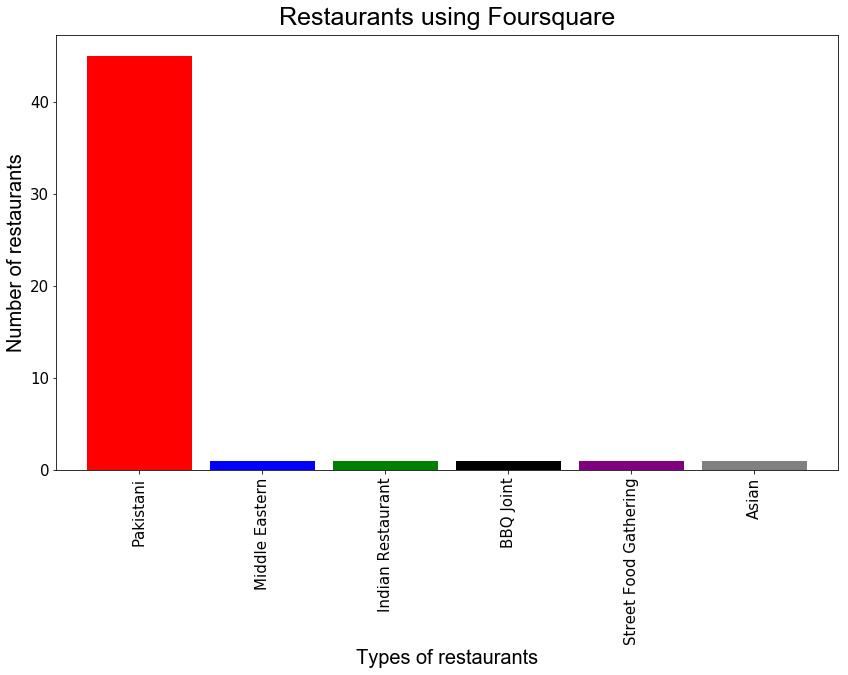

In [60]:
#Using Pandas
ax = df_pk['categories_simplified'].value_counts().plot(kind='bar', 
                                                   figsize=(14,8), 
                                                   width=.85,
                                                   color=['red','blue','green','black',
                                                          'purple','gray', 'orange','brown',
                                                          'yellow','silver'])                                         
                                                                                       
ax.set_title("Restaurants using Foursquare", fontname='Arial', fontsize=25, y=1.01)
ax.set_xlabel("Types of restaurants", fontname="Arial", fontsize=20)
ax.set_ylabel("Number of restaurants", fontname="Arial", fontsize=20) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

## 3. Methodology

Since involving several factors, the decision to open a Pakistani restaurant in a locality of Karachi must be made, where each factor influences on finding an optimal restaurant location. The locality serves different cuisines for instance, Middle Eastern, Asian, Indian, Street food and BBQ. Since, a variety of food types are served, hence, it is important the subject restaurant will serve the favourite food (particularly, in the optimal vicinity) with amenities like minimum distance to public restaurant, offering food at reasonable cost (moreover dependent on restaurant's rental prices in the area). 
To achieve this goal, this project considers the technique **K-means Clustering** to make segmentations of the types of Pakistani restaurants or, the restaurant with benefits. After that, research about the prices to rent a place for opening a restaurant will be made. In addition, the optimal location should be accessible by public transportation. In the end, the focus will be to find locations that have approximately 300 m from the public transport. 
Following factors are moreover considered in performing the restaurant search:
 
* number of existing Pakistani restaurants in the selected radius
* prices and locations of restaurants in Karachi to open a restaurant
* segmentation of types of Pakistani restaurants in a neighbourhood
* distance of the available places to rent nearby public transportation

**K-means Clustering** is an unsupervised machine learning algorithm, which is used to cluster and/or segment the data types.

In [61]:
karachi_onehot = pd.get_dummies(df_pk[['categories']], prefix="", prefix_sep="")
 
karachi_onehot['neighborhood'] = df_pk['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [karachi_onehot.columns[-1]] + list(karachi_onehot.columns[:-1])
karachi_onehot = karachi_onehot[fixed_columns]
karachi_onehot = karachi_onehot.groupby('neighborhood').mean().reset_index()

In [62]:
karachi_onehot.head()

,neighborhood,Asian Restaurant,BBQ Joint,Indian Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Street Food Gathering
0,"16 C 3rd St, D.H.A Phase 6 Rahat Commercial Area",0,0,0,0,1,0
1,1C Bukhari Commercial Lane 13 Opposite Khayaba...,0,0,0,0,1,0
2,"26th St, Tauheed Commercial Area (Kh-e-Shamsheer)",0,0,0,0,1,0
3,2nd Floor Dolmen City Mall Clifton,0,0,0,0,1,0
4,"31/1 Zulfiqar Street 1, D.H.A. Phase 8 Zone A ...",0,0,0,0,1,0


In [63]:
karachi_grouped = karachi_onehot.groupby('neighborhood').mean().reset_index()

In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [65]:

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))  
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))  

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = karachi_grouped['neighborhood']

for ind in np.arange(karachi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(karachi_grouped.iloc[ind, :], num_top_venues)

In [66]:
neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"16 C 3rd St, D.H.A Phase 6 Rahat Commercial Area",Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
1,1C Bukhari Commercial Lane 13 Opposite Khayaba...,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
2,"26th St, Tauheed Commercial Area (Kh-e-Shamsheer)",Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
3,2nd Floor Dolmen City Mall Clifton,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
4,"31/1 Zulfiqar Street 1, D.H.A. Phase 8 Zone A ...",Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint


### 3.1 Cluster Neighborhoods

A set of clusters was formulated in order to analyse and evaluate the obtained data sets.

In [67]:
# Clustering
# set number of clusters
kclusters = 5

karachi_grouped_clustering = karachi_grouped.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(karachi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [68]:
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers.shape

(5, 6)

In [69]:
neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

In [70]:
neighborhoods_venues_sorted.head()

,Cluster Labels,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,"16 C 3rd St, D.H.A Phase 6 Rahat Commercial Area",Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
1,1,1C Bukhari Commercial Lane 13 Opposite Khayaba...,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
2,1,"26th St, Tauheed Commercial Area (Kh-e-Shamsheer)",Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
3,1,2nd Floor Dolmen City Mall Clifton,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
4,1,"31/1 Zulfiqar Street 1, D.H.A. Phase 8 Zone A ...",Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint


In [71]:
df_pk.head()

,id,name,categories,lat,lng,neighborhood,postal code,price,categories_simplified
0,52d9009c11d2079ba506dca1,The East End,Pakistani Restaurant,24.830433,67.038430,"CC-2, Block 8, Clifton",75600,4500,Pakistani
1,4b5fdbf6f964a520f9ce29e3,Bar-B-Q Tonight,Pakistani Restaurant,24.816201,67.021181,"Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Bl...",75600,5000,Pakistani
2,4b5d5cc1f964a520d85a29e3,Shaikh Abdul Ghaffar Kabab House,Pakistani Restaurant,24.876738,67.065969,Off Shaheed-e-Millat Rd (Delhi Mercantile Hous...,75400,3500,Pakistani
3,4e189aa56284ea7246fa36c6,The Pakistani,Indian Restaurant,24.846429,67.026303,Club Road,75530,4500,Indian Restaurant
4,4cb026cd562d224b511a1488,Mirchili,Pakistani Restaurant,24.799193,67.046309,"Shop 1&2, 15-C, Badar Commercial Area, Phase 5...",75500,5000,Pakistani


In [72]:
# add clustering labels

karachi_merged = df_pk

# merge grouped data with latitude/longitude for each neighborhood
karachi_merged = karachi_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')
karachi_merged.head() # check the last columns!

,id,name,categories,lat,lng,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,52d9009c11d2079ba506dca1,The East End,Pakistani Restaurant,24.830433,67.038430,"CC-2, Block 8, Clifton",75600,4500,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
1,4b5fdbf6f964a520f9ce29e3,Bar-B-Q Tonight,Pakistani Restaurant,24.816201,67.021181,"Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Bl...",75600,5000,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
2,4b5d5cc1f964a520d85a29e3,Shaikh Abdul Ghaffar Kabab House,Pakistani Restaurant,24.876738,67.065969,Off Shaheed-e-Millat Rd (Delhi Mercantile Hous...,75400,3500,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
3,4e189aa56284ea7246fa36c6,The Pakistani,Indian Restaurant,24.846429,67.026303,Club Road,75530,4500,Indian Restaurant,2,Indian Restaurant,Street Food Gathering,Pakistani Restaurant,Middle Eastern Restaurant,BBQ Joint
4,4cb026cd562d224b511a1488,Mirchili,Pakistani Restaurant,24.799193,67.046309,"Shop 1&2, 15-C, Badar Commercial Area, Phase 5...",75500,5000,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint


## 4. Analysis  <a name="Analysis"></a>

The analysis is carried out to investigate **K-mean Clustering**, obtain clusters and create datasets for each of obatained clusters.

### Cluster 0

In [73]:
karachi_merged.loc[karachi_merged['Cluster Labels'] == 0, karachi_merged.columns[[0] + list(range(5, karachi_merged.shape[1]))]].head()

,id,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
38,4dafdf06f7b149e03f3d3b5a,"Marriott Hotel, Abdullah Haroon Rd",75520,15000,Asian,0,Asian Restaurant,Street Food Gathering,Pakistani Restaurant,Middle Eastern Restaurant,Indian Restaurant
49,59ea29e66fa81f72c84fa4dd,Khalid bin Waleed Rd.,75100,2600,Middle Eastern,0,Middle Eastern Restaurant,Street Food Gathering,Pakistani Restaurant,Indian Restaurant,BBQ Joint


In [74]:
karachi_merged['categories'].loc[karachi_merged['Cluster Labels'] == 0].count()

2

In [75]:
karachi_merged.loc[karachi_merged['Cluster Labels'] == 0, karachi_merged.columns[[0] + list(range(5, karachi_merged.shape[1]))]].head()

,id,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
38,4dafdf06f7b149e03f3d3b5a,"Marriott Hotel, Abdullah Haroon Rd",75520,15000,Asian,0,Asian Restaurant,Street Food Gathering,Pakistani Restaurant,Middle Eastern Restaurant,Indian Restaurant
49,59ea29e66fa81f72c84fa4dd,Khalid bin Waleed Rd.,75100,2600,Middle Eastern,0,Middle Eastern Restaurant,Street Food Gathering,Pakistani Restaurant,Indian Restaurant,BBQ Joint


In [76]:
clusterone = karachi_merged.loc[karachi_merged['Cluster Labels'] == 1, karachi_merged.columns[[1] + list(range(5, karachi_merged.shape[1]))]]
karachi_merged['categories'].loc[karachi_merged['Cluster Labels'] == 1].count()

45

### Cluster 1

In [77]:
karachi_merged.loc[karachi_merged['Cluster Labels'] == 1, karachi_merged.columns[[1] + list(range(5, karachi_merged.shape[1]))]]

,name,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,The East End,"CC-2, Block 8, Clifton",75600,4500,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
1,Bar-B-Q Tonight,"Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Bl...",75600,5000,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
2,Shaikh Abdul Ghaffar Kabab House,Off Shaheed-e-Millat Rd (Delhi Mercantile Hous...,75400,3500,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
4,Mirchili,"Shop 1&2, 15-C, Badar Commercial Area, Phase 5...",75500,5000,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
5,Zahid Nihari,Tariq Road,75401,4500,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
7,KhanJi,"F-44/2, Block-4 Scheme-5 Clifton, Karachi, Pak...",75600,4000,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
8,Kolachi,Ocean Mall,75600,3500,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
9,Tandoori Hut,Main Boat Basin,75600,4500,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
10,Waheed Kebab House,Burns Road,75500,2000,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
11,Sajjad Restaurant,DHA Phase 8,75500,5500,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint


In [78]:
clustertwo = karachi_merged.loc[karachi_merged['Cluster Labels'] == 2, karachi_merged.columns[[1] + list(range(5, karachi_merged.shape[1]))]]

In [79]:
karachi_merged['categories'].loc[karachi_merged['Cluster Labels'] == 2].count()

1

### Cluster 2

In [80]:
karachi_merged.loc[karachi_merged['Cluster Labels'] == 2, karachi_merged.columns[[1] + list(range(5, karachi_merged.shape[1]))]].head()

,name,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,The Pakistani,Club Road,75530,4500,Indian Restaurant,2,Indian Restaurant,Street Food Gathering,Pakistani Restaurant,Middle Eastern Restaurant,BBQ Joint


### Cluster 3

In [81]:
karachi_merged.loc[karachi_merged['Cluster Labels'] == 3, karachi_merged.columns[[1] + list(range(5, karachi_merged.shape[1]))]]

,name,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
15,Ghaffar Kabab House,"Port Grand, Native Jetty Bridge (M. T. Khan Rd)",74000,6000,BBQ Joint,3,BBQ Joint,Street Food Gathering,Pakistani Restaurant,Middle Eastern Restaurant,Indian Restaurant


In [82]:
karachi_merged['categories'].loc[karachi_merged['Cluster Labels'] == 3].count()

1

In [83]:
karachi_merged.loc[karachi_merged['Cluster Labels'] == 3, karachi_merged.columns[[1] + list(range(5, karachi_merged.shape[1]))]]

,name,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
15,Ghaffar Kabab House,"Port Grand, Native Jetty Bridge (M. T. Khan Rd)",74000,6000,BBQ Joint,3,BBQ Joint,Street Food Gathering,Pakistani Restaurant,Middle Eastern Restaurant,Indian Restaurant


### Cluster 4

In [84]:
karachi_merged.loc[karachi_merged['Cluster Labels'] == 4, karachi_merged.columns[[1] + list(range(5, karachi_merged.shape[1]))]]

,name,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Boat Basin,Kh-e-Saadi (Kh-e-Roomi),75500,5000,Street Food Gathering,4,Street Food Gathering,Pakistani Restaurant,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint


In [85]:
karachi_merged['categories'].loc[karachi_merged['Cluster Labels'] == 4].count()

1

In [86]:
karachi_merged.loc[karachi_merged['Cluster Labels'] == 4, karachi_merged.columns[[1] + list(range(5, karachi_merged.shape[1]))]]

,name,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Boat Basin,Kh-e-Saadi (Kh-e-Roomi),75500,5000,Street Food Gathering,4,Street Food Gathering,Pakistani Restaurant,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint


In [87]:
#!pip install Geometry
#!pip install shapely
import shapely

#!pip install pyproj
import pyproj

#!pip install maths
import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

In [88]:
#!pip install pyproj
X = list(karachi_merged['lat']);
Y = list(karachi_merged['lng']);
x, y = lonlat_to_xy(X, Y)
pakistani_list = [(x[n],y[n]) for n in range(len(x))]
pakistani_list;

C:\Users\saify\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  


In [89]:
X1 = list(df_r['Latitude']);
Y1 = list(df_r['Longitude']);
x1, y1 = lonlat_to_xy(X1, Y1)
rent_list = [(x1[n],y1[n]) for n in range(len(x1))]
rent_list;

C:\Users\saify\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  


In [94]:
df_m = pd.read_csv('https://raw.githubusercontent.com/saify62/CapstoneProject-Week4-5/main/metro.csv')
df_m.drop(['Unnamed: 0'], axis=1, inplace=True);
df_m.head()

,id,name,categories,lat,lng,neighborhood,distance [m]
0,52d9009c11d2079ba506dca1,M Clifton,Metro Station,24.830433,67.038430,"CC-2, Block 8, Clifton",5915
1,4b5fdbf6f964a520f9ce29e3,M Clifton,Metro Station,24.816201,67.021181,"Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Bl...",5868
2,4b5d5cc1f964a520d85a29e3,M Mhaheed-e-Millat Rd,Metro Station,24.876738,67.065969,Off Shaheed-e-Millat Rd (Delhi Mercantile Hous...,7821
3,4e189aa56284ea7246fa36c6,M Club Road,Metro Station,24.846429,67.026303,Club Road,3961
4,4cb026cd562d224b511a1488,M D.H.A,Metro Station,24.799193,67.046309,"Shop 1&2, 15-C, Badar Commercial Area, Phase 5...",8892


In [95]:
X2 = list(df_m['lat']);
Y2 = list(df_m['lng']);
x2, y2 = lonlat_to_xy(X2, Y2)
metro_list = [(x2[n],y2[n]) for n in range(len(x2))]
metro_list;

C:\Users\saify\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  


In [96]:
optimal_list=[]

In [97]:
# Places (for restaurants) to rent
for place_to_rent in rent_list:
    distances_to_restaurants = [calc_xy_distance(place_to_rent[0], place_to_rent[1], pak[0], pak[1]) for pak in pakistani_list]
    closest_restaurant = min(distances_to_restaurants)
    
    distances_to_transport = [calc_xy_distance(place_to_rent[0], place_to_rent[1], transp[0], transp[1]) for transp in metro_list]
    closest_transport = min(distances_to_transport)
    
    optimal_list.append((closest_transport)+abs(closest_restaurant - 300))

In [98]:
optimal_list;

In [99]:
df_optimal=pd.DataFrame(optimal_list,columns=['Score'])

In [100]:
df_optimal['Score'].head()

0    300.0
1    300.0
2    300.0
3    300.0
4    300.0
Name: Score, dtype: float64

In [101]:
df_r['Score'] = df_optimal['Score']
df_r.head()

,Postcode,Price,Latitude,Longitude,Score
0,75600,4500,24.830433,67.038430,300.0
1,75600,5000,24.816201,67.021181,300.0
2,75400,3500,24.876738,67.065969,300.0
3,75530,4500,24.846429,67.026303,300.0
4,75500,5000,24.799193,67.046309,300.0


In [102]:
df_address = pd.DataFrame({'Postcode': [75600, 75600, 75400, 75530, 75500, 75401, 75500, 75600, 75600, 75600, 75500, 75500, 75500, 74600, 75350, 74000, 75550, 75950, 75850, 75520, 75950, 75350, 75400, 75500, 75600, 75950, 75520, 75300, 75530, 75350, 75510, 75500, 75600, 75600, 75500, 75300, 75500, 75400, 75520, 75270, 75500, 75500, 75260, 75290, 75270, 75260, 75350, 75290, 75290, 75100],'Address': ['CC-2, Block 8, Clifton', 'Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Block-5 (Khayaban-e-Saadi, opp. Bilawal Chowrangi)', 'Off Shaheed-e-Millat Rd (Delhi Mercantile Housing Society)', 'Club Road', 'Shop 1&2, 15-C, Badar Commercial Area, Phase 5, DHA (Khayaban-e-Badar)', 'Tariq Road', 'Kh-e-Saadi (Kh-e-Roomi)', 'F-44/2, Block-4 Scheme-5 Clifton, Karachi, Pakistan', 'Ocean Mall', 'Main Boat Basin', 'Burns Road', 'DHA Phase 8', 'Beach Ave', 'North Nazimabad (Near Skahi Hassan)', 'Arena, Karsaz Rd', 'Port Grand, Native Jetty Bridge (M. T. Khan Rd)', 'Alamgir Road', 'F.B.Area block 18', 'Sector 15-A/5, Bufferzone, (North Nazimbad Town)', 'Pearl Continental, Club Rd', 'Gulistan-e-Johar, Rashid Minhas Road', 'Shahrah-e-Faisal', 'Allama Iqbal Road', '1C Bukhari Commercial Lane 13 Opposite Khayaban-e-Shujaat DHA Phase 6', 'Boat Basin, Kh-e-Roomi', 'D1, Rashid Minhas Rd', 'Avari Towers', 'University Rd, Block-13A, Gulshan-e-Iqbal', 'Club Road (Dr. Ziauddin Ahmed Rd.)', 'Nursery, Shahrah-e-Faisal', 'Aslam Road', '26th St, Tauheed Commercial Area (Kh-e-Shamsheer)', 'Block 2, Clifton', '2nd Floor Dolmen City Mall Clifton', 'Badar Commercial St 10 (Off 26th Street)', 'Bahadurabad Chowrangi (Alamgir St)', 'Badar Comm. Area (10th Badar Comm. St)', 'Tipu Sultan Road', 'Marriott Hotel, Abdullah Haroon Rd', 'University Rd', '31/1 Zulfiqar Street 1, D.H.A. Phase 8 Zone A Phase 8', '16 C 3rd St, D.H.A Phase 6 Rahat Commercial Area', 'Gulshan-e-Jamal, (Near Dalmia)', 'Near Disco Bakery', 'Off Abul Hasan Isphahani Rd', 'Gulshan-e-Jamal Rd, Block C Gulshan-e-Iqbal', 'Mohammad Ali Society', 'Opp. KFC. near Disco Bakery. Block 4, Gulshan-e-Iqbal', 'Block 1, Gulistan-eJauhar', 'Khalid bin Waleed Rd.']})

In [103]:
df_address

,Postcode,Address
0,75600,"CC-2, Block 8, Clifton"
1,75600,"Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Bl..."
2,75400,Off Shaheed-e-Millat Rd (Delhi Mercantile Hous...
3,75530,Club Road
4,75500,"Shop 1&2, 15-C, Badar Commercial Area, Phase 5..."
5,75401,Tariq Road
6,75500,Kh-e-Saadi (Kh-e-Roomi)
7,75600,"F-44/2, Block-4 Scheme-5 Clifton, Karachi, Pak..."
8,75600,Ocean Mall
9,75600,Main Boat Basin


In [104]:
df_r['Address'] = df_address['Address']

In [105]:
df_r = df_r.sort_values(by=['Score']).reset_index()

In [106]:
df_r.shape

(50, 7)

In [107]:
df_r = df_r.set_index('Address')

In [108]:
df_r.head()

,index,Postcode,Price,Latitude,Longitude,Score
Address,,,,,,
"CC-2, Block 8, Clifton",0,75600,4500,24.830433,67.038430,300.0
"University Rd, Block-13A, Gulshan-e-Iqbal",27,75300,2000,24.904386,67.077488,300.0
Club Road (Dr. Ziauddin Ahmed Rd.),28,75530,4600,24.846723,67.026029,300.0
"Nursery, Shahrah-e-Faisal",29,75350,4200,24.860488,67.064217,300.0
Aslam Road,30,75510,1800,24.860545,67.013575,300.0


## 5. Results and discussions  <a name="Results and discussions"></a>

The results as obtained were based on a set of clusters, where each cluster consisted of following information:

- the name, address, postal code and average cuisine price
- longitude and latitude of the restaurants
- most common venues (from **1st to 5th**) in each cluster


In [109]:
karachi_merged.tail(3)

,id,name,categories,lat,lng,neighborhood,postal code,price,categories_simplified,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
47,56508b44498e0883ba0183db,Kebabistan,Pakistani Restaurant,24.931224,67.100488,"Opp. KFC. near Disco Bakery. Block 4, Gulshan-...",75290,2000,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
48,5904f60c26659b6a847ff7cb,Chai Mahal,Pakistani Restaurant,24.928437,67.114411,"Block 1, Gulistan-eJauhar",75290,1590,Pakistani,1,Pakistani Restaurant,Street Food Gathering,Middle Eastern Restaurant,Indian Restaurant,BBQ Joint
49,59ea29e66fa81f72c84fa4dd,Ridan,Middle Eastern Restaurant,24.809480,67.034120,Khalid bin Waleed Rd.,75100,2600,Middle Eastern,0,Middle Eastern Restaurant,Street Food Gathering,Pakistani Restaurant,Indian Restaurant,BBQ Joint


In [110]:
list_columns=list(karachi_merged)  # shows the columns

In [111]:
karachi_merged.to_csv('karachi_merged.csv')

In [112]:
#Rename column head 
karachi_merged = karachi_merged.rename(columns = {'Cluster Labels': 'cluster_labels', 
                                                '1st Most Common Venue':'top_venues_categories'}) 
karachi_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
id                       50 non-null object
name                     50 non-null object
categories               50 non-null object
lat                      50 non-null float64
lng                      50 non-null float64
neighborhood             50 non-null object
postal code              50 non-null int64
price                    50 non-null int64
categories_simplified    50 non-null object
cluster_labels           50 non-null int32
top_venues_categories    50 non-null object
2nd Most Common Venue    50 non-null object
3rd Most Common Venue    50 non-null object
4th Most Common Venue    50 non-null object
5th Most Common Venue    50 non-null object
dtypes: float64(2), int32(1), int64(2), object(10)
memory usage: 5.7+ KB


In [113]:
#Finds the top venue's categories per cluster
top_venues_category = karachi_merged.groupby('cluster_labels')['top_venues_categories'].apply(lambda x: x.value_counts().index[0]).reset_index()
top_venues_category

,cluster_labels,top_venues_categories
0,0,Asian Restaurant
1,1,Pakistani Restaurant
2,2,Indian Restaurant
3,3,BBQ Joint
4,4,Street Food Gathering


In [114]:
# displays column value based on frequency value of another column in pandas
freq_top_venue_cat = karachi_merged.groupby('cluster_labels').top_venues_categories.agg(['count', 'first'])
freq_top_venue_cat

,count,first
cluster_labels,,
0,2,Asian Restaurant
1,45,Pakistani Restaurant
2,1,Indian Restaurant
3,1,BBQ Joint
4,1,Street Food Gathering


In [115]:
# counts how many times the most common venue category appears in the cluster (equivalent to COUNTIFS, from Excel) 
count_top_venue_cluster_0 = (karachi_merged[karachi_merged['top_venues_categories'] == 'Pakistani Restaurant']['cluster_labels'] == 0).count()
count_top_venue_cluster_1 = (karachi_merged[karachi_merged['top_venues_categories'] == 'Asian Restaurant']['cluster_labels'] == 1).count()
count_top_venue_cluster_2 = (karachi_merged[karachi_merged['top_venues_categories'] == 'Pakistani Restaurant']['cluster_labels'] == 2).count()
count_top_venue_cluster_3 = (karachi_merged[karachi_merged['top_venues_categories'] == 'Middle-Eastern Restaurant']['cluster_labels'] == 3).count()
count_top_venue_cluster_4 = (karachi_merged[karachi_merged['top_venues_categories'] == 'Asian Restaurant']['cluster_labels'] == 4).count()
print('cluster0:' + str(count_top_venue_cluster_0),
      'cluster1:' + str(count_top_venue_cluster_1), 
      'cluster2:' + str(count_top_venue_cluster_2), 
      'cluster3:' + str(count_top_venue_cluster_3),
      'cluster4:' + str(count_top_venue_cluster_4))

cluster0:45 cluster1:1 cluster2:45 cluster3:0 cluster4:1


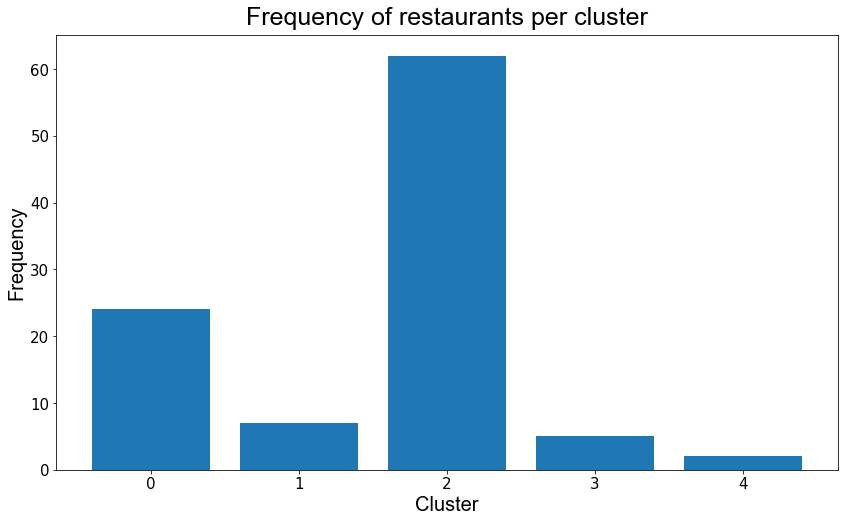

In [116]:
clusters = ['0','1','2','3','4']   #axis X     #clusters
frequency = [24,7,62, 5,2]   #axis Y   #number of resturant by cluster.

#x = np.arange(len(label))  # the label locations
width = 0.35  # the width of the bars

#figsize=(14,8)
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(clusters, frequency)

ax.set_title('Frequency of restaurants per cluster', fontname='Arial', fontsize=25, y=1.01)
ax.set_xlabel('Cluster', fontname='Arial', fontsize=20,  y=1.01)
ax.set_ylabel('Frequency', fontname='Arial', fontsize=20) 

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

In [117]:
df_r.describe()

,index,Postcode,Price,Latitude,Longitude,Score
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.0
mean,24.50000,75438.22000,4091.400000,24.857195,67.058065,300.0
std,14.57738,299.92729,2599.775508,0.048561,0.031590,0.0
min,0.00000,74000.00000,1500.000000,24.778282,66.989577,300.0
25%,12.25000,75350.00000,2500.000000,24.811624,67.031392,300.0
50%,24.50000,75500.00000,4250.000000,24.854619,67.057831,300.0
75%,36.75000,75545.00000,4600.000000,24.895193,67.078045,300.0
max,49.00000,75950.00000,15000.000000,24.955090,67.117584,300.0


In [118]:
df_r = df_r.reset_index()  #reset index

In [119]:
# list(df_r.columns) #list columns names
list_postcode = df_r.Postcode.unique()   #liste vaules por Postcode
list_postcode

array([75600, 75300, 75530, 75350, 75510, 75500, 75400, 75520, 75270,
       75260, 75290, 75950, 75401, 74600, 74000, 75550, 75850, 75100],
      dtype=int64)

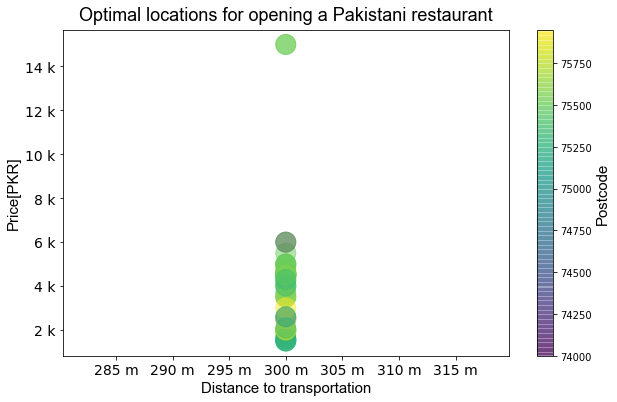

In [120]:
# Multivariable graph (price, distance to public transportation and Postcode) with colour graph

x = df_r['Score']/1000  #defines x and transforms m in km
y = df_r['Price']
z = df_r['Postcode']

fig, ax = plt.subplots(figsize=(10,6))
scat = ax.scatter(x, y, c=z, s=400, marker='o',alpha=0.5)
cb = fig.colorbar(scat)

ax.set_title("Optimal locations for opening a Pakistani restaurant", fontname='Arial', fontsize=18, y=1.01)
ax.set_xlabel("Distance to transportation", fontname="Arial", fontsize=15)
ax.set_ylabel("Price[PKR]", fontname="Arial", fontsize=15) 
plt.gca().xaxis.set_major_formatter(EngFormatter())
plt.gca().yaxis.set_major_formatter(EngFormatter())
cb.set_label('Postcode', fontname="Arial", fontsize=15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

In [123]:
# create map by using Folium
map_clusters = folium.Map(location=[karachi_latitude, karachi_longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

places_rent = folium.map.FeatureGroup()

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(karachi_merged['lat'], karachi_merged['lng'], karachi_merged['categories'], karachi_merged['cluster_labels'] ):
    label = folium.Popup('Cluster ' + str(cluster) +': ' + str(name), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
# add markers to map
for lat, lng, label in zip(df_r['Latitude'], df_r['Longitude'], df_r['Score'] ):
    #label = folium.Popup(label, parse_html=True)
    label = folium.Popup(str(label),  parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)
    
# add markers to map
for lat, lng, name in zip(df_m['lat'], df_m['lng'], df_m['name']):
    #label = folium.Popup(label, parse_html=True)
    label = folium.Popup(str(name),  parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.1,
        parse_html=False).add_to(map_clusters) 

map_clusters

The map as drawn shows places based on data retrieved from the location based services as used in this project.

## 6. Conclusions <a name="Results and discussions"></a>

This project resulted in an optimal location as suitable venues to open a restaurant in the central location of Karachi, which besides being accessible to the public transport also offers reasonable food prices. The list and location of restaurants within a customised proximity was obtained from Foursquare API with latitudes and longitudes as retrieved from the Geocoder. Techniques like data collection, data pre-processing, segmentation and clustering were applied to obtain the required results. The map was drawn with the help of Folium library showing the location of restaurants. 
Finally, a score was calculated as an indicator listing the restaurants.